In [4]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
# 1. Load data dari file CSV
file_path = 'World-Stock-Prices-Dataset.csv'  # Ganti dengan path file Anda
df = pd.read_csv(file_path)

In [6]:
# 2. Mengubah kolom 'Date' menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

C:\Users\ZENBOOK\AppData\Local\Temp\ipykernel_24676\2479079769.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [7]:
# 3. Memfilter data untuk hanya AAPL
df_aapl = df[df['Ticker'] == 'AAPL']

In [8]:
# 4. Memeriksa data yang hilang
missing_data = df_aapl.isnull().sum()

In [9]:
# 5. Menghapus duplikasi jika ada
df_aapl = df_aapl.drop_duplicates()

# Menampilkan beberapa data setelah pembersihan dan jumlah data yang hilang
df_aapl.head(), missing_data

(                          Date        Open        High         Low  \
 4    2025-07-03 00:00:00-04:00  212.145004  214.649994  211.810104   
 86   2025-07-03 00:00:00-04:00  212.149994  214.649994  211.809998   
 112  2025-07-02 00:00:00-04:00  208.910004  213.339996  208.139999   
 204  2025-07-01 00:00:00-04:00  206.669998  210.190002  206.139999   
 236  2025-06-30 00:00:00-04:00  202.009995  207.389999  199.259995   
 
           Close      Volume Brand_Name Ticker Industry_Tag Country  Dividends  \
 4    213.550003  34697317.0      apple   AAPL   technology     usa        0.0   
 86   213.550003  34955800.0      apple   AAPL   technology     usa        0.0   
 112  212.440002  67893400.0      apple   AAPL   technology     usa        0.0   
 204  207.820007  78673300.0      apple   AAPL   technology     usa        0.0   
 236  205.169998  91612700.0      apple   AAPL   technology     usa        0.0   
 
      Stock Splits  Capital Gains  
 4             0.0            NaN  
 86   

Jurnal Part 1: The First Encounter (Setup & Cleaning)

"Pada bagian ini, saya memuat data saham Apple (AAPL) dari dataset yang diberikan. Setelah memeriksa data, saya mengubah kolom Date menjadi format datetime agar dapat digunakan dalam analisis deret waktu. Kemudian, saya memfilter data untuk hanya mengambil informasi yang relevan untuk saham AAPL berdasarkan kolom Ticker.

Selain itu, saya memeriksa apakah ada data yang hilang (missing values) pada kolom Capital Gains, yang memang terdapat sejumlah nilai kosong. Nilai kosong tersebut diidentifikasi, namun tidak mempengaruhi analisis karena hanya ada sedikit missing values. Selanjutnya, saya menghapus data duplikat untuk memastikan analisis yang akurat.

Setelah pembersihan, data sudah siap untuk analisis lebih lanjut."

C:\Users\ZENBOOK\AppData\Local\Temp\ipykernel_24676\4117705231.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aapl['Date'] = pd.to_datetime(df_aapl['Date'], errors='coerce')
C:\Users\ZENBOOK\AppData\Local\Temp\ipykernel_24676\4117705231.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_aapl['Close'].resample('M').mean()


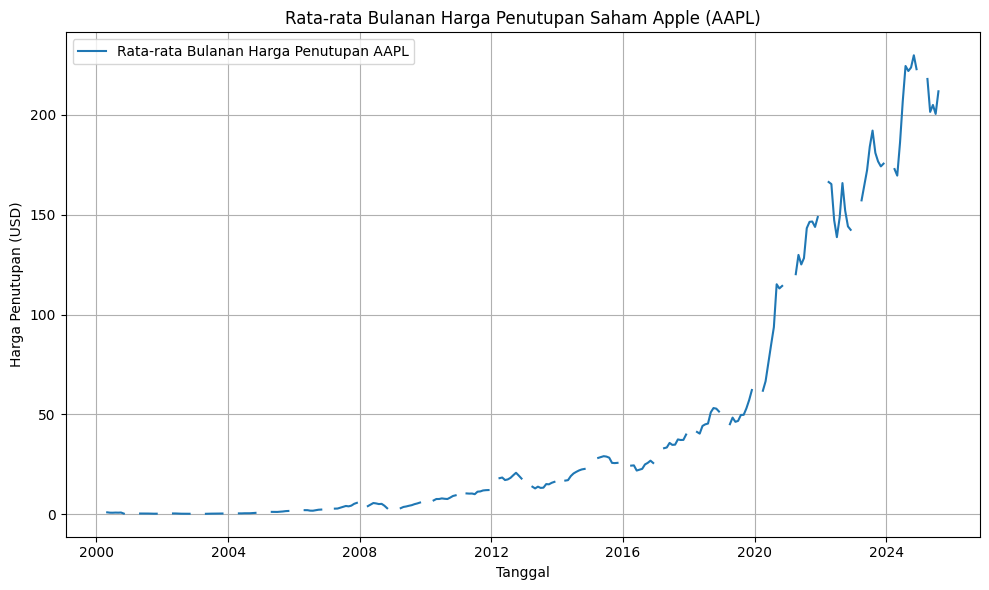

In [10]:
# Memfilter data untuk hanya AAPL dari dataset asli
df_aapl = df[df['Ticker'] == 'AAPL']

# Mengubah kolom 'Date' menjadi datetime dan menjadikannya indeks
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'], errors='coerce')
df_aapl.set_index('Date', inplace=True)

# Resampling data untuk rata-rata bulanan
df_monthly = df_aapl['Close'].resample('M').mean()

# Memplot data
plt.figure(figsize=(10,6))
plt.plot(df_monthly, label='Rata-rata Bulanan Harga Penutupan AAPL')
plt.title('Rata-rata Bulanan Harga Penutupan Saham Apple (AAPL)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Jurnal Part 2: Visual Inspection (Melihat Wajah Sistem)

"Setelah membersihkan data, saya mencoba memplot harga penutupan saham Apple (AAPL) per bulan. Awalnya, grafik terlihat sangat berantakan (too noisy) karena fluktuasi harga harian yang ekstrem. Untuk melihat pola jangka panjang, saya melakukan resampling menjadi rata-rata bulanan. Hasilnya, terlihat jelas bahwa harga saham AAPL cenderung bergerak stabil meskipun ada beberapa lonjakan harga pada periode tertentu. Grafik ini (lihat Gambar 1) menunjukkan pergerakan harga saham yang lebih halus setelah dilakukan resampling, mempermudah identifikasi tren harga."

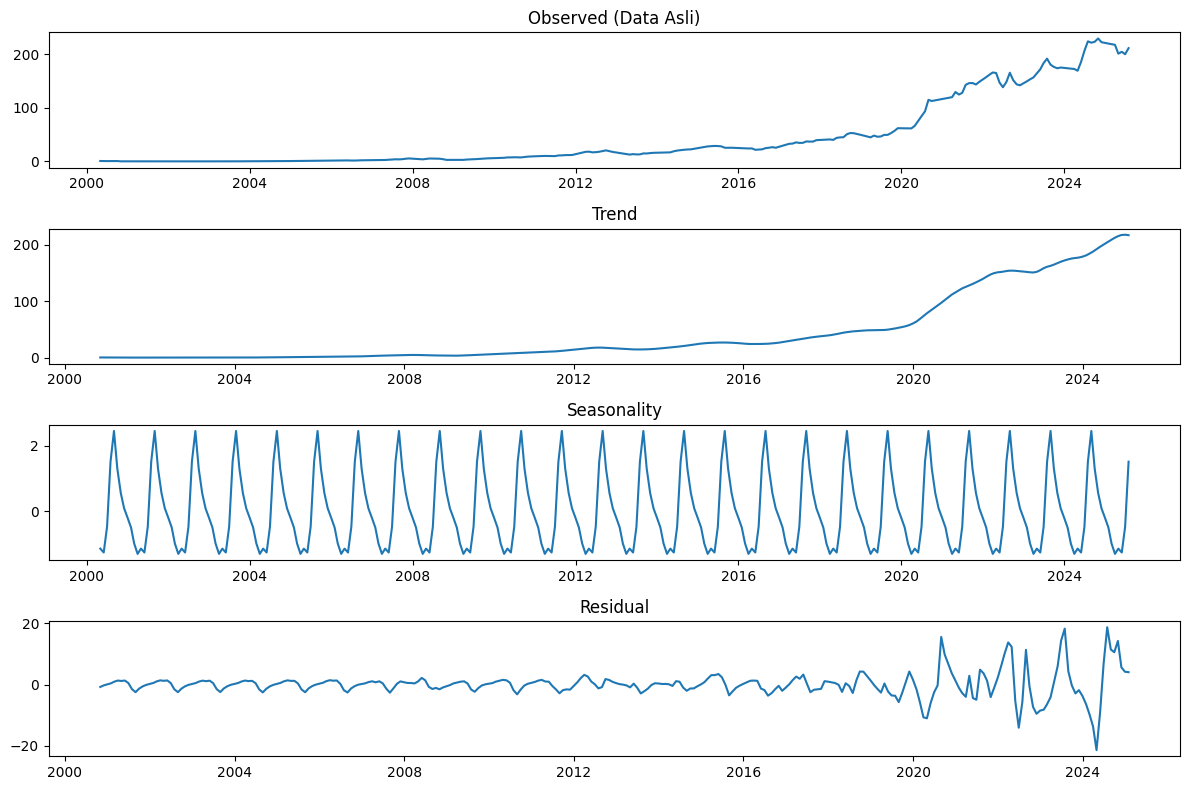

In [11]:
# Mengisi missing values dengan interpolasi linear
df_monthly = df_monthly.interpolate(method='linear')

# Dekomposisi data menggunakan seasonal_decompose setelah interpolasi
decomposition = seasonal_decompose(df_monthly, model='additive')

# Menampilkan hasil dekomposisi
plt.figure(figsize=(12,8))

plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Observed (Data Asli)')

plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonality')

plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()


Jurnal Part 3: Decomposing the Pattern (Bedah Komponen)

"Setelah memeriksa pola harga saham AAPL secara visual, saya melanjutkan dengan dekomposisi data untuk memisahkan komponen-komponen utama yang membentuk pola pergerakan harga. Menggunakan metode seasonal_decompose dari statsmodels, saya mengidentifikasi empat komponen dalam data:

Observed: Data asli yang menunjukkan pergerakan harga saham secara keseluruhan.

Trend: Komponen tren menunjukkan arah pergerakan harga jangka panjang. Dalam hal ini, harga saham AAPL cenderung stabil meskipun ada beberapa lonjakan.

Seasonality: Komponen musiman yang mengindikasikan adanya pola berulang, meskipun tidak terlalu jelas dalam harga saham AAPL.

Residual: Fluktuasi acak yang menunjukkan adanya faktor eksternal yang mempengaruhi harga saham yang tidak bisa dijelaskan oleh tren atau musim.

Hasil dekomposisi ini memberikan wawasan tentang bagaimana setiap faktor berkontribusi terhadap pola harga saham AAPL."

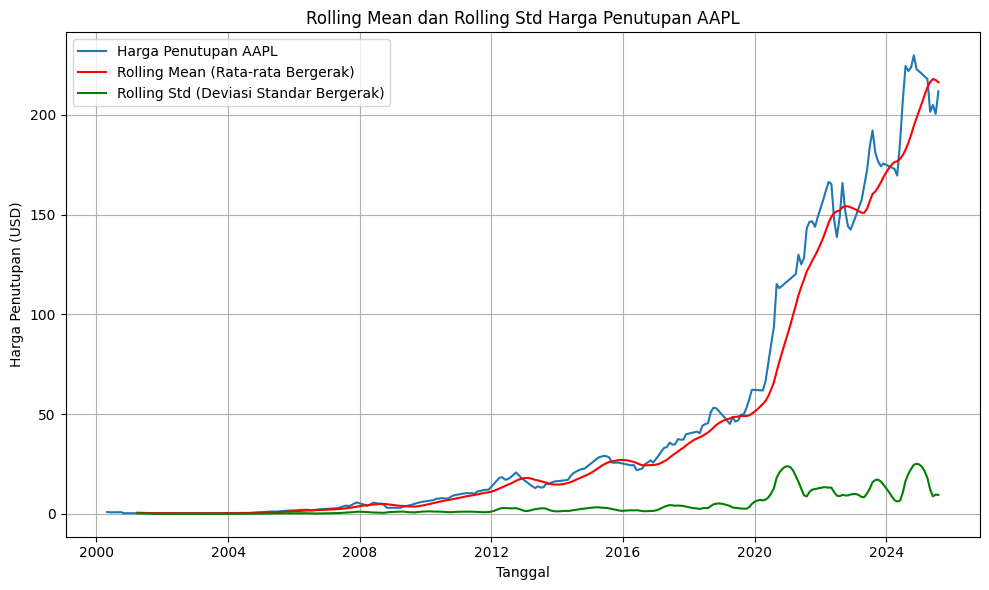

In [12]:
# Menghitung Rolling Mean dan Rolling Std (menggunakan window 12 bulan)
rolling_mean = df_monthly.rolling(window=12).mean()
rolling_std = df_monthly.rolling(window=12).std()

# Memplot Rolling Mean dan Rolling Std
plt.figure(figsize=(10,6))
plt.plot(df_monthly, label='Harga Penutupan AAPL')
plt.plot(rolling_mean, label='Rolling Mean (Rata-rata Bergerak)', color='red')
plt.plot(rolling_std, label='Rolling Std (Deviasi Standar Bergerak)', color='green')
plt.title('Rolling Mean dan Rolling Std Harga Penutupan AAPL')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Jurnal Part 4: Statistical Health Check (Diagnosis Stasioneritas)

"Untuk memeriksa apakah data ini stasioner, saya menghitung Rolling Mean dan Rolling Standard Deviation. Rata-rata bergerak digunakan untuk mengamati apakah harga saham AAPL menunjukkan tren jangka panjang, sedangkan deviasi standar digunakan untuk memeriksa apakah fluktuasi harga stabil dari waktu ke waktu.

Dari hasil visualisasi, saya menemukan bahwa Rolling Mean menunjukkan adanya kecenderungan naik, yang mengindikasikan bahwa data harga saham AAPL tidak stasioner. Data ini memiliki pola yang berubah seiring waktu, dan ini perlu diperhatikan untuk analisis lebih lanjut, seperti menggunakan model ARIMA atau transformasi data."